## Chapter 3. Question 14
## This problem focuses on the collinearity problem.

In [23]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

### (a) Perform the following commands in Python:

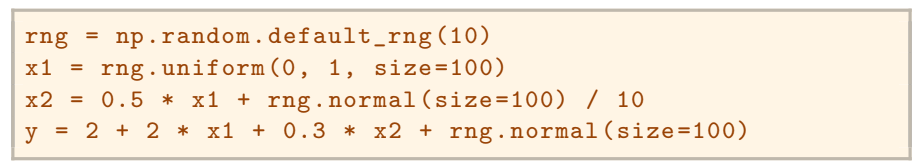


### The last line corresponds to creating a linear model in which y is a function of x1 and x2. Write out the form of the linear model. What are the regression coefficients?

In [24]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

Form of the linear model:
###  y = β0 + β1 * x1 + β2 * x2 + ε

Regression coefficients:
 - β0 = 2
 - β1 = 2
 - β2 = 0.3

### So the linear model is:
y = 2 + 2 * x1 + 0.3 * x2 + ε

### (b) What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.

In [25]:
correlation = np.corrcoef(x1, x2) [0, 1]
print(f"The correlation between x1 and x2 is: {correlation}")

The correlation between x1 and x2 is: 0.772324497691354


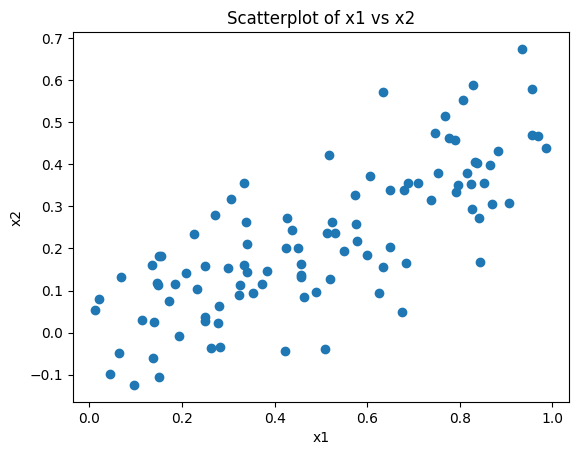

In [26]:
plt.scatter(x1, x2)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatterplot of x1 vs x2")
plt.show()

### (c) Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are βˆ0, βˆ1, and βˆ2? How do these relate to the true β0, β1, and β2? Can you reject the null hypothesis H0 : β1 = 0? How about the null hypothesis H0 : β2 = 0?

In [27]:
X = pd.DataFrame({'x1': x1, 'x2': x2})
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           5.76e-08
Time:                        11:38:16   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.0

### What are βˆ0, βˆ1, and βˆ2? How do these relate to the true β0, β1, and β2?

In [28]:
# Extract the estimated coefficients
beta_hat_0 = model.params['const']
beta_hat_1 = model.params['x1']
beta_hat_2 = model.params['x2']

print(f"\nEstimated Coefficients:")
print(f"βˆ0: {beta_hat_0}")
print(f"βˆ1: {beta_hat_1}")
print(f"βˆ2: {beta_hat_2}")


Estimated Coefficients:
βˆ0: 1.957909291136692
βˆ1: 1.6153676985271601
βˆ2: 0.9427766991595026


They are likely to be close to the true β0, β1, and β2, but they won't be exactly the same due to the random error term (ε).

### Can you reject the null hypothesis H0 : β1 = 0? How about the null hypothesis H0 : β2 = 0?

In [29]:
# Check p-values for significance
p_value_beta_1 = model.pvalues['x1']
p_value_beta_2 = model.pvalues['x2']

print(f"P-value for β1: {p_value_beta_1}")
print(f"P-value for β2: {p_value_beta_2}")

P-value for β1: 0.0028157851837825165
P-value for β2: 0.25941859445244964


By setting threshold as 0.05:

- We can reject the null hypothesis H0: β1 = 0.
- We cannot reject the null hypothesis H0: β2 = 0.

### (d) Now fit a least squares regression to predict y using only x1. Comment on your results. Can you reject the null hypothesis H0 : β1 = 0?

In [30]:
X_x1 = pd.DataFrame({'x1': x1})
X_x1 = sm.add_constant(X_x1)
model_x1 = sm.OLS(y, X_x1).fit()
print(model_x1.summary())

beta_hat_1_x1 = model_x1.params['x1']
print(f"\nEstimated Coefficient for x1 (using only x1): {beta_hat_1_x1}")
p_value_beta_1_x1 = model_x1.pvalues['x1']
print(f"P-value for β1 (using only x1): {p_value_beta_1_x1}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           1.37e-08
Time:                        11:38:16   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9371      0.189     10.242      0.0

The estimatied model is y = 1.94 + 2.08 * x1.

By setting threshold as 0.05, We can reject the null hypothesis H0: β1 = 0 (using only x1).

### (e) Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis H0 : β1 = 0?

In [31]:
X_x2 = pd.DataFrame({'x2': x2})
X_x2 = sm.add_constant(X_x2)
model_x2 = sm.OLS(y, X_x2).fit()
print(model_x2.summary())

beta_hat_1_x2 = model_x2.params['x2']
print(f"\nEstimated Coefficient for x2 (using only x2): {beta_hat_1_x2}")
p_value_beta_1_x2 = model_x2.pvalues['x2']
print(f"P-value for β1 (using only x2): {p_value_beta_1_x2}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           7.43e-07
Time:                        11:38:16   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3239      0.154     15.124      0.0

The estimatied model is y = 2.32 + 2.91 * x2.

By setting threshold as 0.05, we can reject the null hypothesis H0: β1 = 0 (using only x2).

### (f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.

The results **do not contradict each other**; rather, they reflect how the inclusion of both variables in a model can change their individual significance due to **multicollinearity**.

**When evaluated separately, both x1 and x2 are significant, but when included together, x1 dominates, making x2 statistically insignificant.**

### (g) Suppose we obtain one additional observation, which was unfortunately mismeasured. We use the function np.concatenate() to add this additional observation to each of x1, x2 and y.

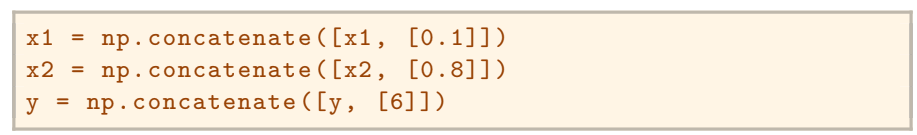

### Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

Model using both x1 and x2:
Intercept (β0): 2.061791259758458
Coefficient for x1 (β1): 0.8575448183694927
Coefficient for x2 (β2): 2.2663234876910465

Model using only x1:
Intercept (β0): 2.073940502406074
Coefficient for x1 (β1): 1.8760456383662114

Model using only x2:
Intercept (β0): 2.2840118640185625
Coefficient for x2 (β1): 3.1458486275754853

Leverage of new point: 0.34767161961426646
Studentized residual of new point: 2.783730622824801


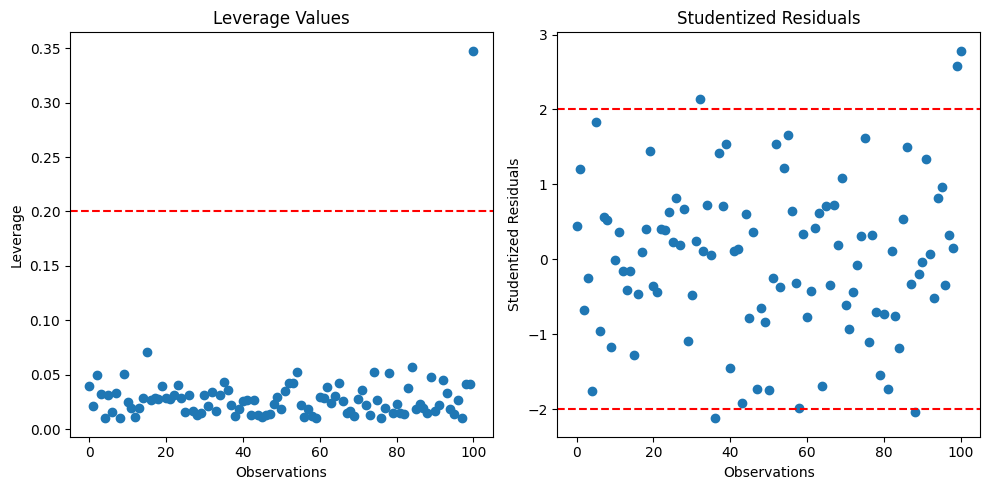

In [32]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

x1_new = np.concatenate([x1, [0.1]])
x2_new = np.concatenate([x2, [0.8]])
y_new = np.concatenate([y, [6]])

df = pd.DataFrame({
    'x1': x1_new,
    'x2': x2_new,
    'y': y_new
})

# (c)
X_new = sm.add_constant(df[['x1', 'x2']])
model_new_both = sm.OLS(df['y'], X_new).fit()
beta0_new_both, beta1_new_both, beta2_new_both = model_new_both.params

# (d)
X_x1_only_new = sm.add_constant(df['x1'])
model_x1_only_new = sm.OLS(df['y'], X_x1_only_new).fit()
beta0_x1_only_new, beta1_x1_only_new = model_x1_only_new.params

# (e)
X_x2_only_new = sm.add_constant(df['x2'])
model_x2_only_new = sm.OLS(df['y'], X_x2_only_new).fit()
beta0_x2_only_new, beta1_x2_only_new = model_x2_only_new.params

# Perform leverage and outlier analysis using statsmodels
influence = model_new_both.get_influence()
leverage = influence.hat_matrix_diag
studentized_residuals = influence.resid_studentized_external

# Check the leverage and residual for the new point
last_point_leverage = leverage[-1]
last_point_student_residual = studentized_residuals[-1]

# Print the updated regression coefficients and leverage analysis
print(f"Model using both x1 and x2:")
print(f"Intercept (β0): {beta0_new_both}")
print(f"Coefficient for x1 (β1): {beta1_new_both}")
print(f"Coefficient for x2 (β2): {beta2_new_both}\n")

print(f"Model using only x1:")
print(f"Intercept (β0): {beta0_x1_only_new}")
print(f"Coefficient for x1 (β1): {beta1_x1_only_new}\n")

print(f"Model using only x2:")
print(f"Intercept (β0): {beta0_x2_only_new}")
print(f"Coefficient for x2 (β1): {beta1_x2_only_new}\n")

# Output for the leverage and residual of the new point
print(f"Leverage of new point: {last_point_leverage}")
print(f"Studentized residual of new point: {last_point_student_residual}")

# Plot the leverage and studentized residuals
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(range(len(leverage)), leverage)
plt.axhline(y=0.2, color='r', linestyle='--')
plt.title('Leverage Values')
plt.xlabel('Observations')
plt.ylabel('Leverage')

plt.subplot(1, 2, 2)
plt.scatter(range(len(studentized_residuals)), studentized_residuals)
plt.axhline(y=2, color='r', linestyle='--')
plt.axhline(y=-2, color='r', linestyle='--')
plt.title('Studentized Residuals')
plt.xlabel('Observations')
plt.ylabel('Studentized Residuals')

plt.tight_layout()
plt.show()


In all models, the new observation has noticeably impacted the coefficients.

### Outlier and High-Leverage Point Analysis:
- Leverage of the new point: 0.35, which is relatively high but not extreme.
- Studentized residual: 2.78, indicating that the new observation is an outlier, as the residual exceeds the common threshold of 2 for identifying outliers.

###Conclusion:
- Outlier: Yes, the new observation is an outlier, as its studentized residual is greater than 2.
- High-Leverage Point: Although the leverage (0.35) is above average, it is not exceptionally high. Leverage values above 0.5 are generally considered high, so this point has moderately high leverage.

Overall, the new observation is both an outlier and moderately influential, significantly affecting the model's coefficients due to its moderate leverage.